### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
import numpy as np # importing convention
m = np.arange(12).reshape((3,4))
print(m)
# nb rows : 3
# nb columns : 4
# nb values : 12 (0 from 11)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [20]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
p1 = np.outer(u,v)
print(p1)
p2= np.array([i*j for i in u for j in v]).reshape((4,4))
print(p2)
u1 = np.tile(u, (4,1)).T
p3=u1*v
print(p3)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [22]:
m=np.random.random((10,6))
m[m < 0.1] = 0
print(m)

[[0.54043337 0.         0.63076958 0.44908466 0.3363161  0.21457454]
 [0.71721983 0.24761252 0.32007548 0.         0.91312495 0.21770102]
 [0.6790746  0.         0.60127319 0.50370738 0.         0.99141864]
 [0.34734848 0.17189656 0.26621497 0.52708604 0.58681002 0.20856752]
 [0.29867661 0.70680801 0.1004751  0.         0.55135478 0.96499065]
 [0.97391048 0.74108764 0.40852363 0.46643697 0.         0.16537269]
 [0.50863823 0.88489791 0.76608275 0.72223447 0.83453515 0.        ]
 [0.96282456 0.66799202 0.92419914 0.43693756 0.85682447 0.43963632]
 [0.51980891 0.95324378 0.1962686  0.         0.46405065 0.17253879]
 [0.97183513 0.34840086 0.94498477 0.16946398 0.23689506 0.83823412]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[3.93492413 3.87145761 0.82506474 0.76159822]


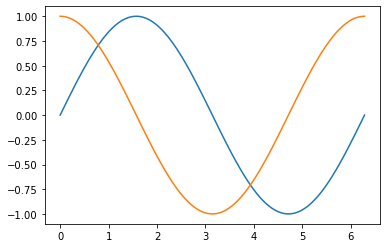

In [33]:
l = np.linspace(0,2*np.pi,100)
l=l[::-1]
el=l[abs(np.cos(l)-np.sin(l))<0.1]
print(el)

import matplotlib.pyplot as plt # everybody imports it that way

%matplotlib inline 
plt.plot(l,np.sin(l),l,np.cos(l))

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [48]:
r = np.arange(1,11,1)
c = np.tile(r, (10,1)).T
mat = c*r
print(mat)
ad = mat[(r-1),r[::-1]-1]
print(ad)
do= mat[(r-1)[0:9],(r)[0:9]]
print(do)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [57]:
dist = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
dists = np.tile(dist,(10,1)).T
grid = abs(dists- dist)
print(grid)


[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [103]:
N=99
def Prime(n):
    
    b = np.array([np.array([(i%j==0) for j in np.arange(1,i+1)]) for i in np.arange(1,n) ])
    mask = np.array([ (True not in vect[1:len(vect)-1]) for vect in b])
    
    return np.arange(1,n)[mask]
    
print(Prime(N))

def SieveOfEratosthenes(n): 

    prime = [True for i in range(n + 1)] 
    p = 2
    while (p * p <= n): 
          
        if (prime[p] == True): 
              
            for i in range(p * 2, n + 1, p): 
                prime[i] = False
        p += 1
    prime[0]= False
    prime[1]= False
    
    return np.array( [p for p in range(n + 1) if prime[p] ]) 

print(SieveOfEratosthenes(N))


[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

[[ 1 -1 -1 ...  1 -1  1]
 [-1  1  1 ...  1  1  1]
 [-1 -1  1 ...  1  1  1]
 ...
 [-1  1  1 ...  1  1  1]
 [-1 -1 -1 ...  1  1  1]
 [-1 -1  1 ... -1  1 -1]]
(1000, 200)


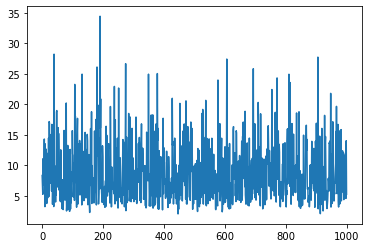

In [145]:
import numpy.random as npr
walkers = npr.randint(-1,1, size=(200,1000))
walkers[walkers==0]=1
print(walkers)
s=np.array([ (np.sum(walkers[0:i],axis=0)) for i in range(200)])
#print(s)
sq= np.square(s).T
print(sq.shape)
moy=np.mean(sq,axis=1)
racine= np.sqrt(moy)

%matplotlib inline 
plt.plot(np.arange(1000),racine)

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]
34080.95238095238 20166.666666666668 42400.0


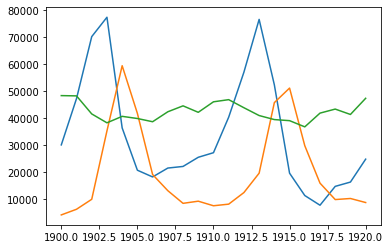

In [161]:
data = np.loadtxt("./populations.txt")
print(data)
d=data.T
plt.plot(d[0],d[1],d[0],d[2],d[0],d[3])

meanhares= np.mean(d[1])
meanlynxes= np.mean(d[2])
meancarrots= np.mean(d[3])
print(meanhares,meanlynxes,meancarrots)
#correlation between the hares and the lynxes, if less hares --> less lynxes